# 1.  데이터 불러오기

In [ ]:
# This code cell performs a specific task
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-stroke-data.csv')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male 67.00             0              1          Yes   
1  51676  Female 61.00             0              0          Yes   
2  31112    Male 80.00             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69 36.60  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92 32.50     never smoked   

   stroke  
0       1  
1       1  
2       1

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 2.  ID 변수 설정

In [ ]:
df['id'].dtypes

dtype('int64')

In [ ]:
df['id'].isnull().sum()   # ID 변수인 id 값의 결측값 확인

0

In [ ]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크

n = len(pd.unique(df['id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트
print(n)

5110


In [ ]:
# 추가 코딩
# 숫자형태가 아닌 SERIALNO의 갯수를 세는 파이썬 코드

mask = pd.to_numeric(df['id'], errors='coerce').isna()
a = mask.sum()
print (a)

0


# 3. 타겟변수 생성

In [ ]:
# 타입 확인
df['stroke'].dtype

dtype('int64')

In [ ]:
# 결측값 확인
df['stroke'].isnull().sum()

In [ ]:
# 결측값 제거
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# 'stroke' 열의 값 빈도 계산
# dropna=False: NaN 값을 포함하여 계산
# normalize=True: 값 빈도를 비율로 계산
df['stroke'].value_counts(dropna=False, normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

# 4. 기타 변수 데이터 처리

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()

age  avg_glucose_level     bmi
count 5110.00            5110.00 4909.00
mean    43.23             106.15   28.89
std     22.61              45.28    7.85
min      0.08              55.12   10.30
25%     25.00              77.25   23.50
50%     45.00              91.88   28.10
75%     61.00             114.09   33.10
max     82.00             271.74   97.60

In [ ]:
df['age'] > 18   # c는 기준(criterion)의 약자

In [ ]:
c = df['age'] > 18   # c는 기준(criterion)의 약자
df[c].head(3)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male 67.00             0              1          Yes   
1  51676  Female 61.00             0              0          Yes   
2  31112    Male 80.00             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69 36.60  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92 32.50     never smoked   

   stroke  
0       1  
1       1  
2       1

In [ ]:
len(df[c])   # df[c]의 자료 개수(행 기준)

4194

In [ ]:
# 추가 코딩
len(df[c]) / len(df)   # df에 대비해서 df[c]의 자료 개수(행 기준) 비율

0.8207436399217222

In [ ]:
df1 = df[c]   # 데이터프레임 df[c]를 df1에 저장

df1.shape

(4194, 12)

In [ ]:
# Residence_type 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns={'Residence_type' : 'residence_type'})

In [ ]:
# 범주형 변수를 cols1에 저장.
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'residence_type', 'smoking_status']
df1[cols1].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [ ]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

# 5. 결측값 50% 초과 변수 제거

In [ ]:
df1.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

bmi    True
dtype: bool

In [ ]:
# bmi의 결측값 비율 확인

df['bmi'].isnull().mean()

0.03933463796477495

# 6. 요약통계 및 도수분포표 점검

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
df1[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기

age  avg_glucose_level     bmi
count 4194.00            4194.00 4014.00
mean    50.66             108.63   30.49
std     17.53              48.00    7.22
min     19.00              55.12   11.30
25%     37.00              77.42   25.50
50%     51.00              92.36   29.30
75%     64.00             116.22   34.20
max     82.00             271.74   92.00

In [ ]:
# 'cols'에 지정된 열들의 왜도(Skewness)를 계산
# 왜도는 분포의 비대칭도를 나타내는 지표로, 0이면 대칭 분포를 의미
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [ ]:
# 'cols'에 지정된 열들의 첨도(Kurtosis)를 계산
# 첨도는 분포의 꼬리 부분의 두터움을 나타내는 지표로, 3이면 정규분포와 동일한 두터움을 의
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [ ]:
# 'work_type' 열의 값 빈도 계산
# dropna=False: NaN 값을 포함하여 계산
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [ ]:
# 'work_type' 열에 대한 교차표(crosstab) 생성
# columns='count': 'count'라는 이름의 열을 생성하여 각 'work_type' 값의 빈도 계산
# frequency table(빈도표)은 각 카테고리 값이 데이터셋에 몇 번 나타나는지
# 이를 통해 데이터의 분포를 쉽게 파악
pd.crosstab(df1['work_type'], columns='count')   # frequency table 생성(개수 기준)

col_0          count
work_type           
Govt_job         648
Never_worked       2
Private         2740
Self-employed    804

In [ ]:
pd.crosstab(df1['work_type'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준).

col_0          ratio
work_type           
Govt_job        0.15
Never_worked    0.00
Private         0.65
Self-employed   0.19

In [ ]:
pd.crosstab(df1['work_type'], df1['stroke'])   # frequency table 생성(개수 기준)

stroke            0    1
work_type               
Govt_job        615   33
Never_worked      2    0
Private        2591  149
Self-employed   739   65

In [ ]:
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)   # frequency table 생성(비율 기준)

stroke           0    1
work_type              
Govt_job      0.15 0.01
Never_worked  0.00 0.00
Private       0.62 0.04
Self-employed 0.18 0.02

# 7. 이상값 제거

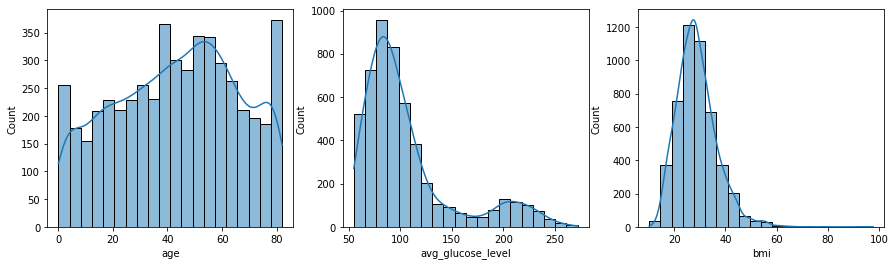

In [ ]:
# This code cell performs a specific task
import matplotlib.pyplot as plt
import seaborn as sns

# 1행 3열의 서브플롯을 생성하고, 전체 그림의 크기를 지정 (가로 15인치, 세로 4인치)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 첫 번째 서브플롯: 'age' 열에 대한 히스토그램을 생성하고 커널 밀도 추정(kde)을 추가
sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20)

# 두 번째 서브플롯: 'avg_glucose_level' 열에 대한 히스토그램을 생성하고 커널 밀도 추정(kde)을 추가
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20)

# 세 번째 서브플롯: 'bmi' 열에 대한 히스토그램을 생성하고 커널 밀도 추정(kde)을 추가
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20)

# 모든 서브플롯을 화면에 출력
plt.show()

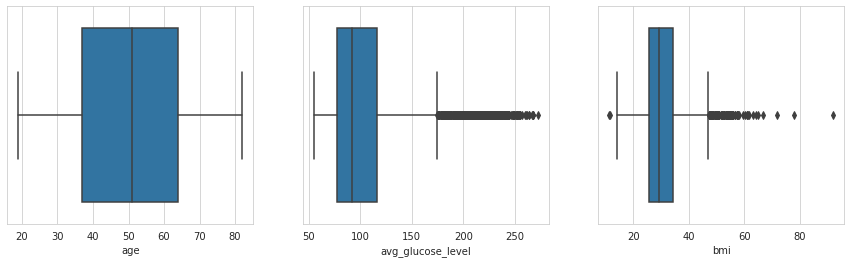

In [ ]:
# Seaborn 스타일을 'whitegrid'로 설정하여 그래프에 흰색 격자 배경을 추가
sns.set_style('whitegrid')

# 1행 3열의 서브플롯을 생성하고, 전체 그림의 크기를 지정 (가로 15인치, 세로 4인치)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 첫 번째 서브플롯: 'age' 열에 대한 박스 플롯을 생성
sns.boxplot(ax=axes[0], x='age', data=df1)

# 두 번째 서브플롯: 'avg_glucose_level' 열에 대한 박스 플롯을 생성
sns.boxplot(ax=axes[1], x='avg_glucose_level', data=df1)

# 세 번째 서브플롯: 'bmi' 열에 대한 박스 플롯을 생성
sns.boxplot(ax=axes[2], x='bmi', data=df1)

# 모든 서브플롯을 화면에 출력
plt.show()

In [ ]:
# 'age', 'avg_glucose_level', 'bmi' 열에 대한 1사분위수(Q1)를 계산
Q1 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)

# 'age', 'avg_glucose_level', 'bmi' 열에 대한 3사분위수(Q3)를 계산
Q3 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)

# IQR(Interquartile Range, 사분위수 범위)을 계산
# IQR = Q3 - Q1로 정의되며, 이는 데이터의 중앙 50% 범위를 나타낸다
IQR = Q3 - Q1

# 계산된 IQR을 출력
print(IQR)

age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [ ]:
# IQR을 사용하여 각 변수의 하한값(Lower)과 상한값(Upper)을 계산
# 이상치 탐지를 위해 Q1에서 3배 IQR을 뺀 값과 Q3에서 3배 IQR을 더한 값을 사용
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR

# 하한값(Lower)을 출력
print(Lower)

age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64


In [ ]:
# 상한값(Upper)을 출력
print(Upper)

age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [ ]:
c1 = df1['avg_glucose_level'] <= 232.64
c2 = df1['bmi'] <= 60.3

# 조건 c1과 c2를 모두 만족하는 데이터로 새로운 데이터프레임 df2 생성
df2 = df1[c1 & c2]
df2.shape

(3915, 12)

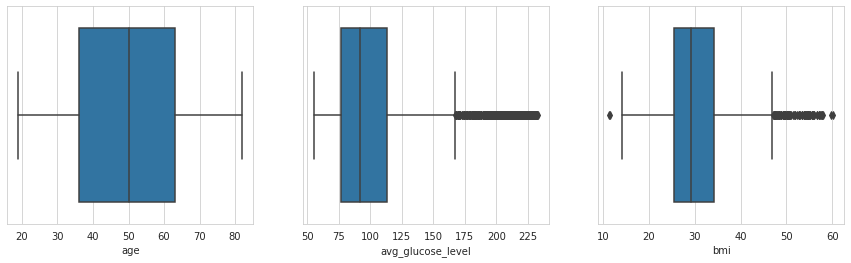

In [ ]:
# 새로운 데이터프레임 df2에 대해 박스 플롯을 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'age', data = df2)
sns.boxplot(ax=axes[1], x = 'avg_glucose_level', data = df2)
sns.boxplot(ax=axes[2], x = 'bmi', data = df2);

# 8. 상관관계 검토

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
round(df2[cols].corr(), 2)               # 구간 변수간 상관계수 디스플레이

age  avg_glucose_level  bmi
age               1.00               0.20 0.02
avg_glucose_level 0.20               1.00 0.16
bmi               0.02               0.16 1.00

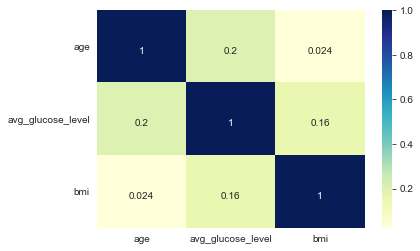

In [ ]:
# Seaborn 라이브러리 임포트
import seaborn as sns

# 'cols'에 지정된 열들 간의 상관계수를 계산
corr = df2[cols].corr()

# 주석(annot)의 시각적 속성 설정
# ha: 가로 정렬(horizontal alignment)을 'center'로 설정
# va: 세로 정렬(vertical alignment)을 'top'으로 설정
annot_kws = {"ha": 'center', "va": 'top'}

# 상관계수 행렬을 히트맵으로 시각화
# data=corr: 상관계수 데이터 사용
# annot=True: 각 셀에 상관계수 값을 표시
# annot_kws=annot_kws: 주석의 시각적 속성 적용
# cmap="YlGnBu": 히트맵의 색상 맵을 'YlGnBu'(Yellow-Green-Blue)로 설정
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

In [ ]:
# csv 로 저장
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-2.csv', index=False)

# 9. t-검정

In [ ]:
from scipy import stats

# 'stroke'가 1인 경우의 'age' 데이터를 추출하여 data_1에 저장
data_1 = df2[df2['stroke'] == 1]['age']

# 'stroke'가 0인 경우의 'age' 데이터를 추출하여 data_0에 저장
data_0 = df2[df2['stroke'] == 0]['age']

# 두 그룹(data_1과 data_0)의 'age'에 대한 독립 표본 t-검정을 수행
# 결과는 p-value < 0.05로 가정 (통계적으로 유의미한 차이가 있음)
stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=14.84966867789424, pvalue=1.4355395712390346e-48)

In [ ]:
from scipy import stats

# 'stroke'가 1인 경우의 'avg_glucose_level' 데이터를 추출하여 data_1에 저장
data_1 = df2[df2['stroke'] == 1]['avg_glucose_level']

# 'stroke'가 0인 경우의 'avg_glucose_level' 데이터를 추출하여 data_0에 저장
data_0 = df2[df2['stroke'] == 0]['avg_glucose_level']

# 두 그룹(data_1과 data_0)의 'avg_glucose_level'에 대한 독립 표본 t-검정을 수행
# 결과는 p-value < 0.05로 가정 (통계적으로 유의미한 차이가 있음)
stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=7.200791069659755, pvalue=7.144119062259364e-13)

In [ ]:
from scipy import stats

# 'stroke'가 1인 경우의 'bmi' 데이터를 추출하여 data_1에 저장
data_1 = df2[df2['stroke'] == 1]['bmi']

# 'stroke'가 0인 경우의 'bmi' 데이터를 추출하여 data_0에 저장
data_0 = df2[df2['stroke'] == 0]['bmi']

# 두 그룹(data_1과 data_0)의 'bmi'에 대한 독립 표본 t-검정을 수행
# 결과는 p-value > 0.05로 가정 (통계적으로 유의미한 차이가 없음)
stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=-0.42810612400712617, pvalue=0.6685974193789274)

# 10. 데이터 추가 처리


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-2.csv')
df.shape

(3915, 12)

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df['gender'].value_counts(dropna=False)   # 개수 기준 분포 구하기

Female    2402
Male      1512
Other        1
Name: gender, dtype: int64

In [ ]:
df['gender'].value_counts(dropna=False, normalize=True)   # 분포 기준 분포 구하기

Female    0.613538
Male      0.386207
Other     0.000255
Name: gender, dtype: float64

In [ ]:
# 범주형 변수를 cols1에 저장
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'residence_type', 'smoking_status']
df1 = df[cols1]   # 범주형 변수만 모은 cols1로 구성된 데이터프레임 df1을 생성

# 데이터프레임 df1안의 컬럼명을 순차적으로 value_counts() 구문에 넣어서 결과 출력
for col in df1.columns:
    print ("")
    print ("---- %s ---" % col)
    print (df[col].value_counts(dropna=False, normalize=True))


---- gender ---
Female    0.613538
Male      0.386207
Other     0.000255
Name: gender, dtype: float64

---- hypertension ---
0    0.891699
1    0.108301
Name: hypertension, dtype: float64

---- heart_disease ---
0    0.941507
1    0.058493
Name: heart_disease, dtype: float64

---- ever_married ---
Yes    0.794636
No     0.205364
Name: ever_married, dtype: float64

---- work_type ---
Private          0.655428
Self-employed    0.187995
Govt_job         0.156066
Never_worked     0.000511
Name: work_type, dtype: float64

---- residence_type ---
Urban    0.5106
Rural    0.4894
Name: residence_type, dtype: float64

---- smoking_status ---
never smoked       0.419668
formerly smoked    0.201277
Unknown            0.199234
smokes             0.179821
Name: smoking_status, dtype: float64


In [ ]:
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [ ]:
df['ever_married'].value_counts()

Yes    3111
No      804
Name: ever_married, dtype: int64

In [ ]:
cols2 = ['ever_married']
df100 = pd.get_dummies(df, columns=cols2)
#df100['ever_married'].value_counts()

In [ ]:
list(df100.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'ever_married_No',
 'ever_married_Yes']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # OrdinalEncoder를 import

# 'ever_married' 열을 OrdinalEncoder를 사용하여 인코딩하고, 새로운 열 'ever_married_encoded'에 저장
df['ever_married_encoded'] = OrdinalEncoder().fit_transform(df['ever_married'].values.reshape(-1, 1))

# 'ever_married'와 'ever_married_encoded' 열의 값을 그룹화하여 개수를 계산
# 변경 전후 변수값 비교표를 출력
df.groupby(['ever_married', 'ever_married_encoded']).size()

ever_married  ever_married_encoded
No            0.0                      804
Yes           1.0                     3111
dtype: int64

In [ ]:
# 'gender' 열을 OrdinalEncoder를 사용하여 인코딩하고, 새로운 열 'gender_encoded'에 저장
df['gender_encoded'] = OrdinalEncoder().fit_transform(df['gender'].values.reshape(-1, 1))

# 'gender'와 'gender_encoded' 열의 값을 그룹화하여 개수를 계산
# 변경 전후 변수값 비교표를 출력
df.groupby(['gender', 'gender_encoded']).size()

gender  gender_encoded
Female  0.0               2402
Male    1.0               1512
Other   2.0                  1
dtype: int64

In [ ]:
# 'work_type' 열을 OrdinalEncoder를 사용하여 인코딩하고, 새로운 열 'work_type_encoded'에 저장
df['work_type_encoded'] = OrdinalEncoder().fit_transform(df['work_type'].values.reshape(-1, 1))

# 'work_type'와 'work_type_encoded' 열의 값을 그룹화하여 개수를 계산
# 변경 전후 변수값 비교표를 출력
df.groupby(['work_type', 'work_type_encoded']).size()

work_type      work_type_encoded
Govt_job       0.0                   611
Never_worked   1.0                     2
Private        2.0                  2566
Self-employed  3.0                   736
dtype: int64

In [ ]:
# 'residence_type' 열을 OrdinalEncoder를 사용하여 인코딩하고, 새로운 열 'residence_type_encoded'에 저장
df['residence_type_encoded'] = OrdinalEncoder().fit_transform(df['residence_type'].values.reshape(-1, 1))

# 'residence_type'와 'residence_type_encoded' 열의 값을 그룹화하여 개수를 계산
# 변경 전후 변수값 비교표를 출력
df.groupby(['residence_type', 'residence_type_encoded']).size()

residence_type  residence_type_encoded
Rural           0.0                       1916
Urban           1.0                       1999
dtype: int64

In [ ]:
# 'smoking_status' 열을 OrdinalEncoder를 사용하여 인코딩하고, 새로운 열 'smoking_status_encoded'에 저장
df['smoking_status_encoded'] = OrdinalEncoder().fit_transform(df['smoking_status'].values.reshape(-1, 1))

# 'smoking_status'와 'smoking_status_encoded' 열의 값을 그룹화하여 개수를 계산
# 변경 전후 변수값 비교표를 출력
df.groupby(['smoking_status', 'smoking_status_encoded']).size()

smoking_status   smoking_status_encoded
Unknown          0.0                        780
formerly smoked  1.0                        788
never smoked     2.0                       1643
smokes           3.0                        704
dtype: int64

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'ever_married_encoded', 'gender_encoded',
       'work_type_encoded', 'residence_type_encoded',
       'smoking_status_encoded'],
      dtype='object')

In [ ]:
# drop(inplace=True)가 있는 구문은 한 번만 실행할 수 있습니다.
# 두번째 실행하면 이미 특정 변수명이 drop된 상태여서 에러를 발생합니다.
df.drop(['id','residence_type','ever_married','gender','work_type','smoking_status'],
        axis=1, inplace=True)

In [ ]:
# 책에서는 df.columns라는 더 간단한 명령어를 사용했습니다.
list(df.columns)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'ever_married_encoded',
 'gender_encoded',
 'work_type_encoded',
 'residence_type_encoded',
 'smoking_status_encoded']

In [ ]:
df.shape

(3915, 11)

In [ ]:
df.isna().any()[lambda x: x]   # null value를 갖고 있는 변수명(컬럼명) 찾기

Series([], dtype: bool)

In [ ]:
df['bmi'].isnull().sum()       # bmi의 결측값 개수 확인

0

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-3.csv', index=False)